In [1]:
import scanpy as sc
import scIB

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
import warnings
warnings.filterwarnings('ignore')

/home/icb/daniel.strobl/miniconda3/envs/dev/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.4.post1 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [2]:
exec(open("../../scIB/tests/test_metrics.py").read())

In [3]:
adata = utils.create_adata_dummy(pca=True, neighbors=True)

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


PCA
computing PCA with n_comps = 50
    finished (0:00:00)
Nearest Neigbours
computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)


In [4]:
adata

AnnData object with n_obs × n_vars = 2730 × 3451 
    obs: 'paul15_clusters', 'celltype', 'batch'
    uns: 'iroot', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'

In [5]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9978259  0.9936757  0.9786413  0.9775189  0.9696475
     0.9608218  0.95708084 0.94955087 0.9380223  0.92706764 0.9199976
     0.913004   0.903892   0.894238  ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


In [6]:
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


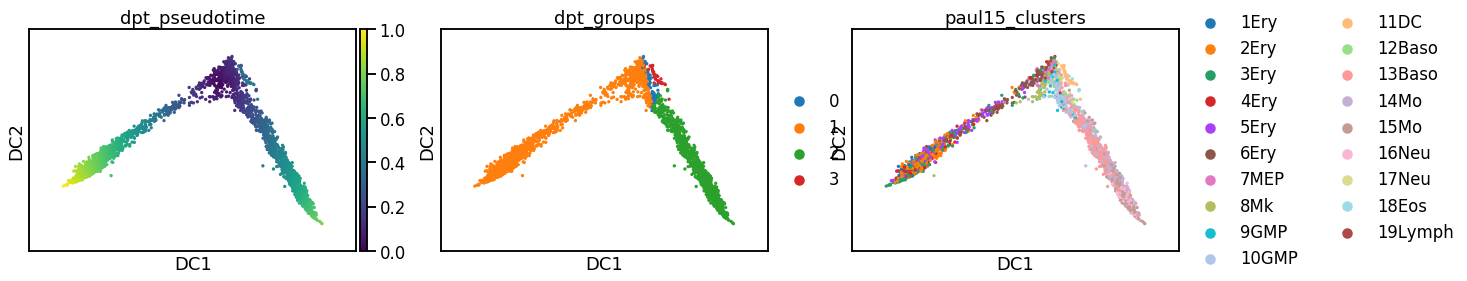

In [7]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups', 'paul15_clusters'])

In [8]:
pst = adata.obs["dpt_pseudotime"]

In [9]:
from scipy.stats import spearmanr

In [10]:
spearmanr(pst, pst)

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

## Immune cell Data

In [34]:
post_file2 = "/storage/groups/ml01/workspace/scIB/immune_cell_hum/integration/unscaled/full_feature/scanorama.h5ad"

In [80]:
post_file3 = "/storage/groups/ml01/workspace/scIB/immune_cell_hum/integration/unscaled/full_feature/mnn.h5ad"

In [41]:
post_file4 = "/storage/groups/ml01/workspace/scIB/immune_cell_hum/integration/unscaled/full_feature/R/seurat.h5ad"

In [2]:
pre_file = "/storage/groups/ml01/workspace/group.daniela/immune_cells/Immune_ALL_human.h5ad"
post_file = "/storage/groups/ml01/workspace/group.daniela/immune_cells/output/Immune_ALL_human_scanorama_hvg0.h5ad"
adata_pre = sc.read(pre_file)
adata_post = sc.read(post_file)

In [68]:
adata_post2 = sc.read(post_file2)
adata_post2.obs.index = [i[:-2] for i in adata_post2.obs.index]

In [81]:
adata_post3 = sc.read(post_file3)

In [84]:
adata_post3.obs.index = [i[:-2] for i in adata_post3.obs.index]

In [42]:
adata_post4 = sc.read(post_file4)

In [98]:
adata_post5 = sc.read("/storage/groups/ml01/workspace/scIB/immune_cell_hum/integration/unscaled/full_feature/bbknn.h5ad")

Subset datasets

In [13]:
adata_post.obs.index = [i[:-2] for i in adata_post.obs.index]

In [3]:
cell_subset = adata_pre.obs.index[adata_pre.obs["dpt_pseudotime"].notnull()]

In [5]:
cell_subset

Index(['AAACGGGCACCTCGGA-1-Oetjen_A', 'AAACGGGCACGGATAG-1-Oetjen_A',
       'AAACGGGGTTTGACTG-1-Oetjen_A', 'AACACGTTCCAAACAC-1-Oetjen_A',
       'AACCGCGTCATCTGTT-1-Oetjen_A', 'AACGTTGCAATGGATA-1-Oetjen_A',
       'AACTCTTTCGACGGAA-1-Oetjen_A', 'AACTGGTTCCTGCAGG-1-Oetjen_A',
       'AACTGGTTCGCCTGTT-1-Oetjen_A', 'AACTGGTTCTCACATT-1-Oetjen_A',
       ...
       'TTGTAGGCAAGGACAC-1-Oetjen_U', 'TTGTAGGCACTGCCAG-1-Oetjen_U',
       'TTGTAGGGTCATGCAT-1-Oetjen_U', 'TTGTAGGTCACTTATC-1-Oetjen_U',
       'TTTACTGAGGGAACGG-1-Oetjen_U', 'TTTATGCAGCCATCGC-1-Oetjen_U',
       'TTTCCTCGTTGGTTTG-1-Oetjen_U', 'TTTGCGCCAGCTTAAC-1-Oetjen_U',
       'TTTGCGCTCAAGGCTT-1-Oetjen_U', 'TTTGTCAAGACATAAC-1-Oetjen_U'],
      dtype='object', name='index', length=2629)

In [101]:
adata_pre = adata_pre[cell_subset]
adata_post = adata_post5[cell_subset]

In [86]:
scIB.pp.reduce_data(adata_post)

HVG


ValueError: setting an array element with a sequence.

In [89]:
from scipy import sparse

In [97]:
adata_post.X

ArrayView([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
             0.00000000e+00,  0.00000000e+00,  1.22496085e-02],
           [ 1.39581086e-02,  0.00000000e+00,  0.00000000e+00, ...,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
           ...,
           [-2.18358677e-04, -1.57324786e-04,  1.36480330e-05, ...,
            -1.05523730e-04,  1.89469938e-04, -1.85677156e-04],
           [-2.26350094e-04, -1.61476870e-04,  1.40487509e-05, ...,
            -1.08070097e-04,  2.03257019e-04, -1.99164628e-04],
           [-2.22534683e-04, -1.56040871e-04,  1.25499046e-05, ...,
            -1.00279554e-04,  5.82748791e-03,  9.82580613e-03]],
          dtype=float32)

In [44]:
def get_root(adata_pre, adata_post, dpt_dim=3):
    
    # minimum DPT candidate cell indices
    min_dpt = np.flatnonzero(adata_pre.obs["dpt_pseudotime"] == 0)
    #min_dpt = adata_pre.obs.index[adata_pre.obs.dpt_pseudotime == 0]
    
    # compute Diffmap for adata_post
    sc.tl.diffmap(adata_post)
    
    # determine most extreme cell in adata_post Diffmap
    min_dpt_cell = np.zeros(len(min_dpt))
    for dim in np.arange(dpt_dim):
        
        diffmap_mean = adata_post.obsm["X_diffmap"][:, dim].mean()
        diffmap_min_dpt = adata_post.obsm["X_diffmap"][min_dpt, dim]
        
        # choose optimum function
        if diffmap_min_dpt.mean() < diffmap_mean:
            opt = np.argmin
        else:
            opt = np.argmax
        # count opt cell
        min_dpt_cell[opt(diffmap_min_dpt)] += 1
    
    # root cell is cell with max vote
    return min_dpt[np.argmax(min_dpt_cell)]

In [77]:
def trajectory_conservation(adata_pre, adata_post):
    cell_subset = adata_pre.obs.index[adata_pre.obs["dpt_pseudotime"].notnull()]
    adata_pre_sub = adata_pre[cell_subset]
    adata_post_sub = adata_post[cell_subset]
    
    adata_post_sub.uns['iroot'] = get_root(adata_pre_sub, adata_post_sub)
    
    sc.tl.dpt(adata_post_sub)
    return adata_post_sub.obs.dpt_pseudotime.corr(adata_pre_sub.obs.dpt_pseudotime, 'spearman')

In [102]:
trajectory_conservation(adata_pre, adata_post)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.0005051   1.0004914   1.0003664   0.9993055   0.9968834   0.9911382
      0.99032015  0.9797883   0.97717756  0.97343236  0.9697408   0.9667744
      0.96188825  0.95858294 -1.0000162 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


0.6717738755624935

In [71]:
adata_post.uns['iroot'] = get_root(adata_pre, adata_post)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99785715 0.9950373  0.98885554 0.97212446 0.9709288
     0.9694772  0.9626244  0.9619907  0.95623964 0.9535087  0.9412267
     0.9391457  0.9337372  0.9268323 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


In [58]:
adata_post.uns['iroot']

1504

In [72]:
sc.tl.dpt(adata_post)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


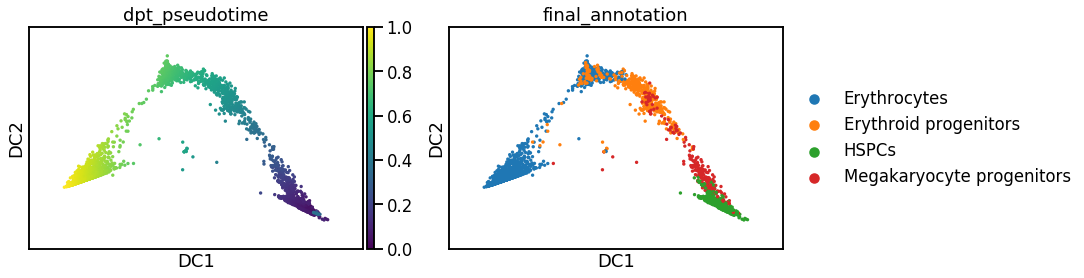

In [73]:
sc.pl.diffmap(adata_post, color=['dpt_pseudotime', 'final_annotation'])

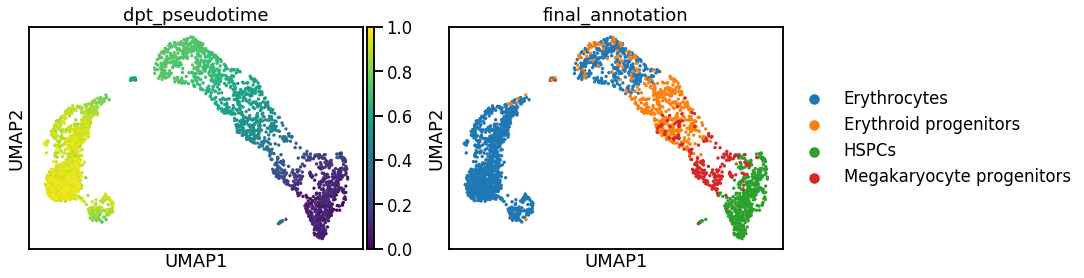

In [74]:
sc.pl.umap(adata_post, color=['dpt_pseudotime', 'final_annotation'])

In [75]:
adata_post.obs.dpt_pseudotime.corr(adata_pre.obs.dpt_pseudotime, 'spearman')

0.7357801301022561

In [66]:
scIB.pp.reduce_data(adata_pre)
#sc.tl.diffmap(adata_pre)

HVG
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.var` of view, copying.


Computed 1999 highly variable genes
PCA
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00)
Nearest Neigbours
computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
UMAP
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


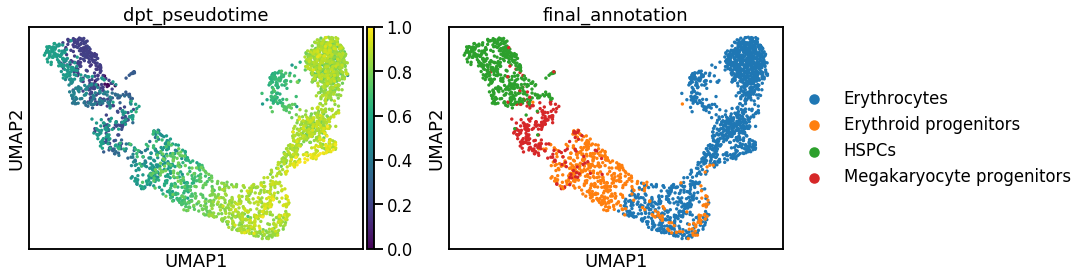

In [67]:
sc.pl.umap(adata_pre, color=['dpt_pseudotime', 'final_annotation'])